# Support Vector Machine (Marketing Response Prediction)

## Explanation

### Objective

### Column Descriptions

- **customer_id** = A unique identifier for each customer.
- **age** = The age of the customer.
- **gender** = The gender of the customer, either 'Male' or 'Female'.
- **annual_income** = The annual income of the customer in dollars.
- **credit_score** = The credit score of the customer, ranging from 300 to 850.
- **employed**  = Whether the customer is currently employed or not, either 'Yes' or 'No'.
- **marital_status**  = The marital status of the customer, either 'Married' or 'Single'.
- **no_of_children** = The number of children the customer has.
- **responded**  = The target variable, indicating whether the customer responded positively ('Yes') or negatively ('No') to the marketing campaign.

## A. Data Preparation

### A.1 Import Libraries

In [450]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [451]:
try:
    df = pd.read_csv('campaign_responses.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [452]:
df.shape

(56, 9)

### A.4 Viewing Data Informations

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB


### A.5 Viewing Data Statistics

In [454]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
customer_id,56.00,28.50,16.31,1.00,14.75,28.50,42.25,56.00
age,56.00,36.21,7.09,25.00,30.00,35.50,42.00,51.00
annual_income,56.00,69017.86,22784.76,35000.00,48000.00,64500.00,90000.00,110000.00
credit_score,56.00,719.11,60.34,600.00,677.50,720.00,770.00,820.00
no_of_children,56.00,1.29,1.19,0.00,0.00,1.00,2.00,3.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [455]:
df.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [456]:
df.tail()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
51,52,31,Female,50000,680,Yes,Single,0,No
52,53,46,Male,98000,800,Yes,Married,3,Yes
53,54,28,Female,42000,630,No,Single,0,No
54,55,41,Male,90000,770,Yes,Married,2,Yes
55,56,34,Female,60000,710,Yes,Single,1,No


### A.7 Viewing Duplicated Data

In [457]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [458]:
df.isna().sum()

customer_id       0
age               0
gender            0
annual_income     0
credit_score      0
employed          0
marital_status    0
no_of_children    0
responded         0
dtype: int64

### A.9 Viewing Outlier Data

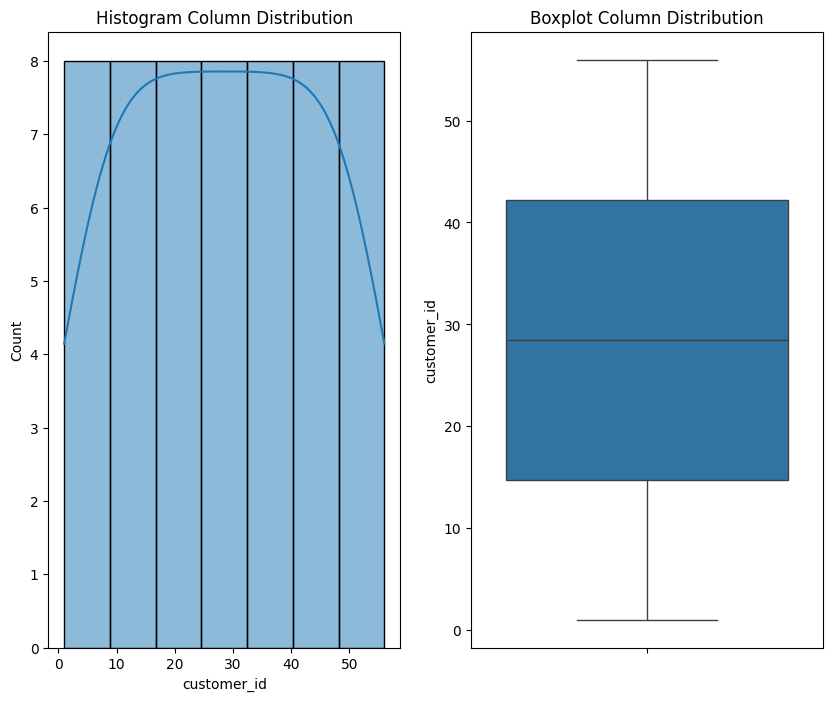

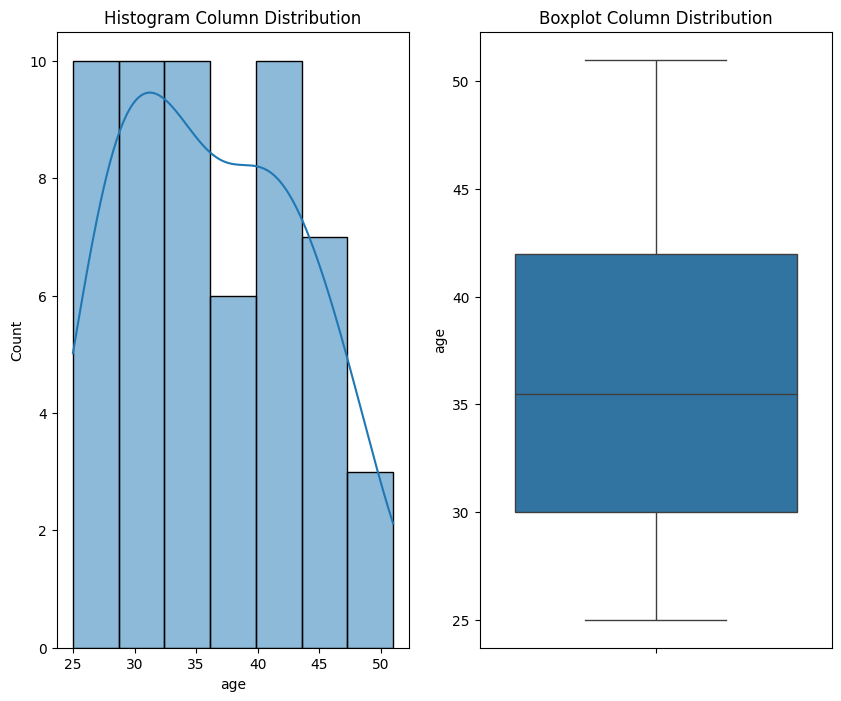

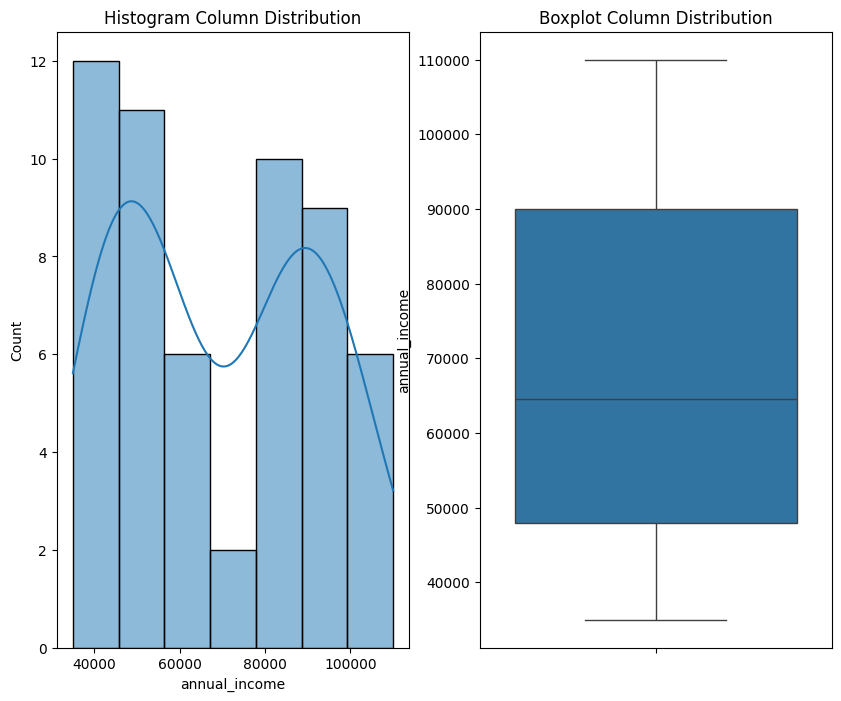

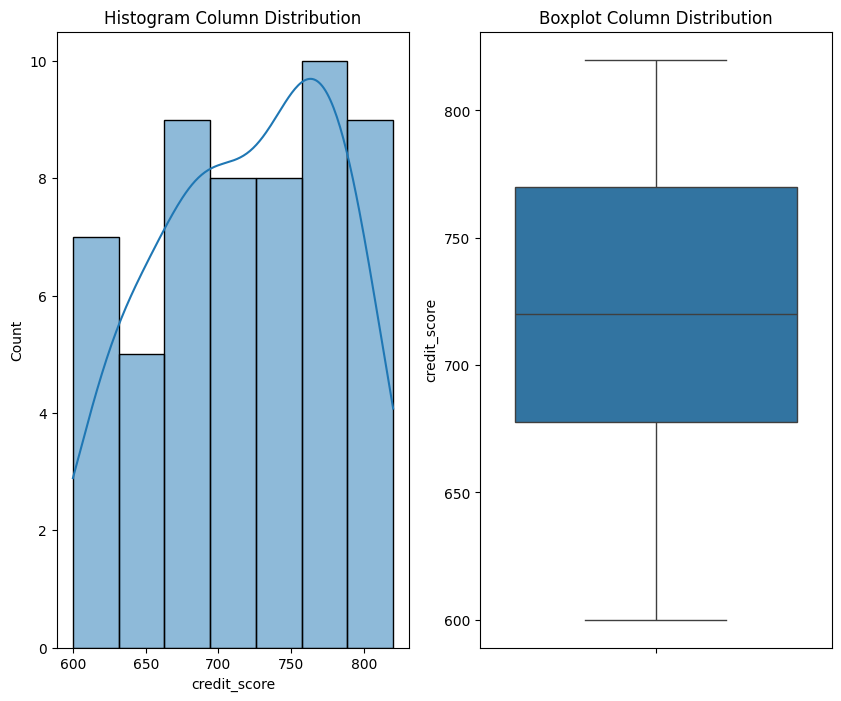

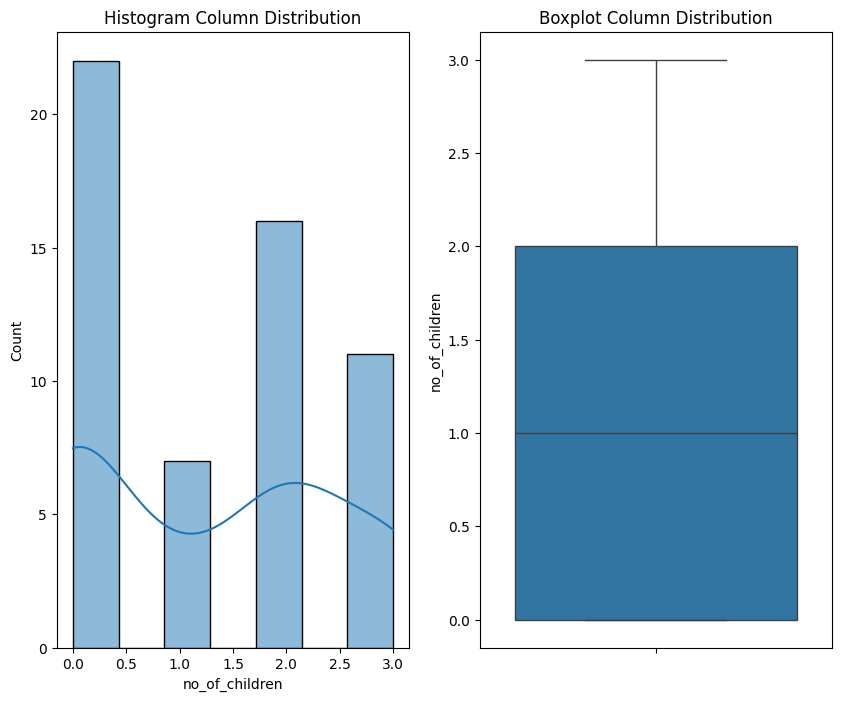

In [459]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title("Histogram Column Distribution")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title("Boxplot Column Distribution")

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [460]:
df.drop(columns=['customer_id'], inplace=True)

### B.2 Mapping Features

#### Object

Gender

In [461]:
gender_mapping = {"Female" : 0, "Male" : 1}

df['gender_map'] = df['gender'].map(gender_mapping)

In [462]:
df['gender_map'].unique()

array([1, 0])

Employed

In [463]:
employed_mapping = {"No" : 0, "Yes" : 1}

df['employed_map'] = df['employed'].map(employed_mapping)

In [464]:
df['employed_map'].unique()

array([1, 0])

Marital Status

In [465]:
marital_status_mapping = {"Single" : 0, "Married" : 1}

df['marital_status_map'] = df['marital_status'].map(marital_status_mapping)

In [466]:
df['marital_status_map'].unique()

array([1, 0])

### B.3 Mapping Label

In [467]:
responded_mapping = {"No" : -1, "Yes" : 1}
responses_mapping = {"No" : "Negative", "Yes" : "Positive"}

df['responded_map'] = df['responded'].map(responded_mapping)
df['responded'] = df['responded'].map(responses_mapping)

In [468]:
df['responded'].unique()

array(['Positive', 'Negative'], dtype=object)

In [469]:
df['responded_map'].unique()

array([ 1, -1])

### B.4 Feature Engineering

#### Adding New Column

Family Size

In [470]:
df['family_size'] = df['marital_status'].apply(lambda x: 2 if x == 'Married' else 1) + df['no_of_children']

Income Per-Capita

In [471]:
df['income_per_capita'] = df['annual_income'] / df['family_size']

## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

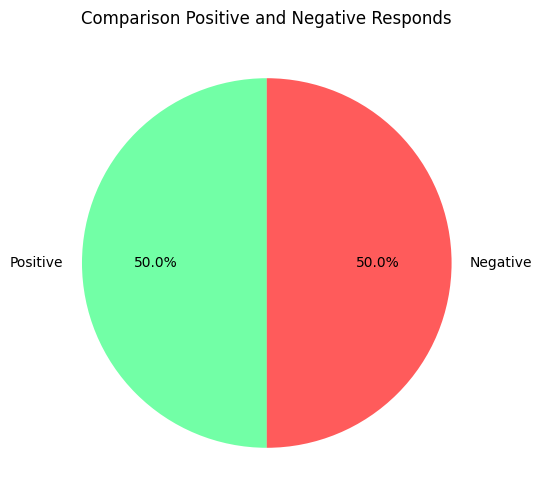

In [472]:
plt.figure(figsize=(6, 6))
df['responded'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#00ff5e8d", "#ff0000a4"])
plt.title("Comparison Positive and Negative Responds")
plt.ylabel(None)
plt.show()

### C.2 Bivariate Analysis

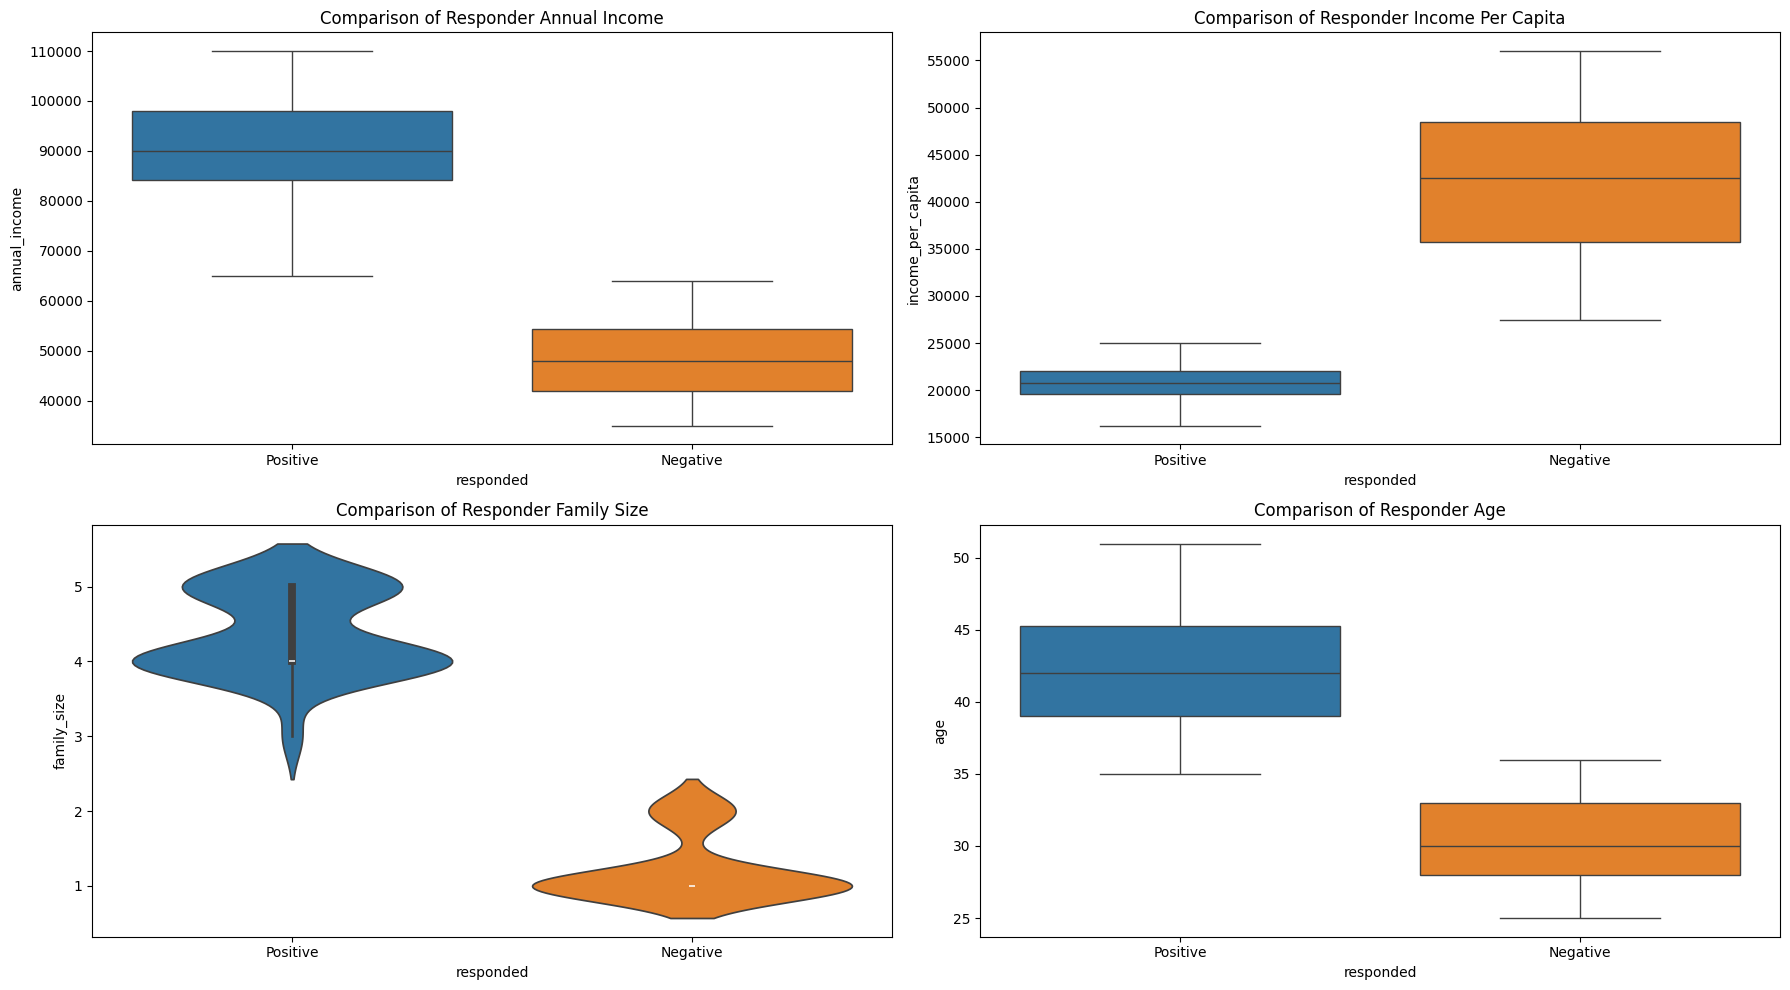

In [473]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.boxplot(x='responded', y='annual_income', data=df, hue='responded', ax=axes[0, 0])
axes[0, 0].set_title("Comparison of Responder Annual Income")

sns.boxplot(x='responded', y='income_per_capita', data=df, hue='responded', ax=axes[0, 1])
axes[0, 1].set_title("Comparison of Responder Income Per Capita")

sns.violinplot(x='responded', y='family_size', data=df, hue='responded', ax=axes[1, 0])
axes[1, 0].set_title("Comparison of Responder Family Size")

sns.boxplot(x='responded', y='age', data=df, hue='responded', ax=axes[1, 1])
axes[1, 1].set_title("Comparison of Responder Age")

plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

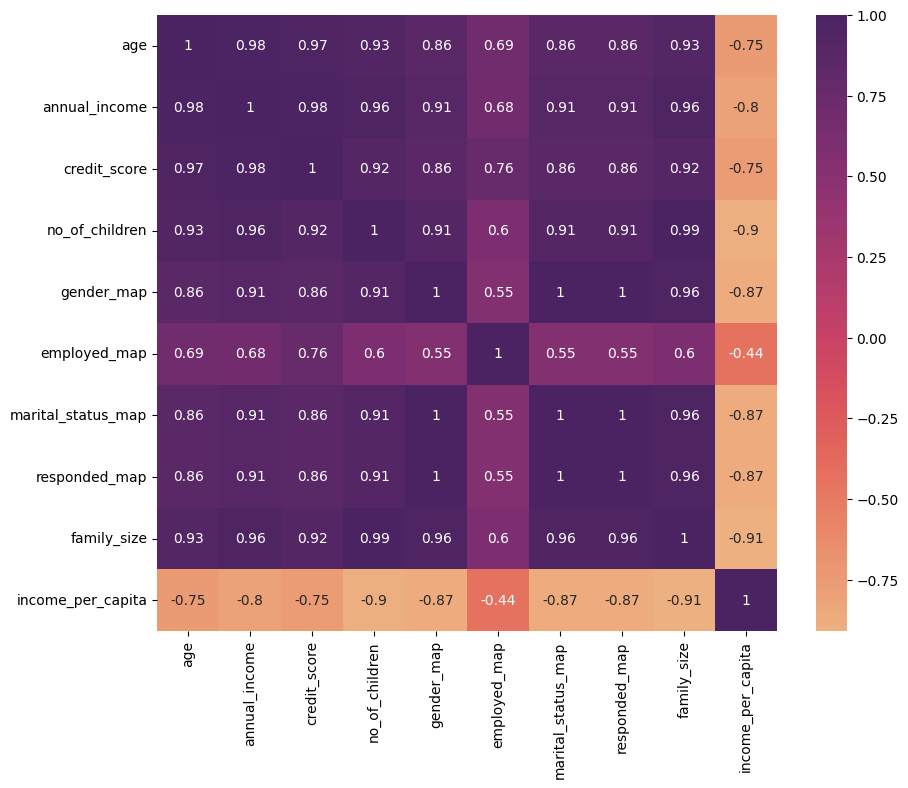

In [474]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare')
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [475]:
X_data = df.drop(columns=['gender', 'employed', 'marital_status', 'responded', 'responded_map'])
y_data = df['responded_map']

### D.2 Splitting Train Data and Test Data (80:20)

In [476]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.3 Feature Scaling

#### Standard Scale Continous Data (Non-Categorical)

Text(0.5, 1.0, 'Features Before Standard Scaling')

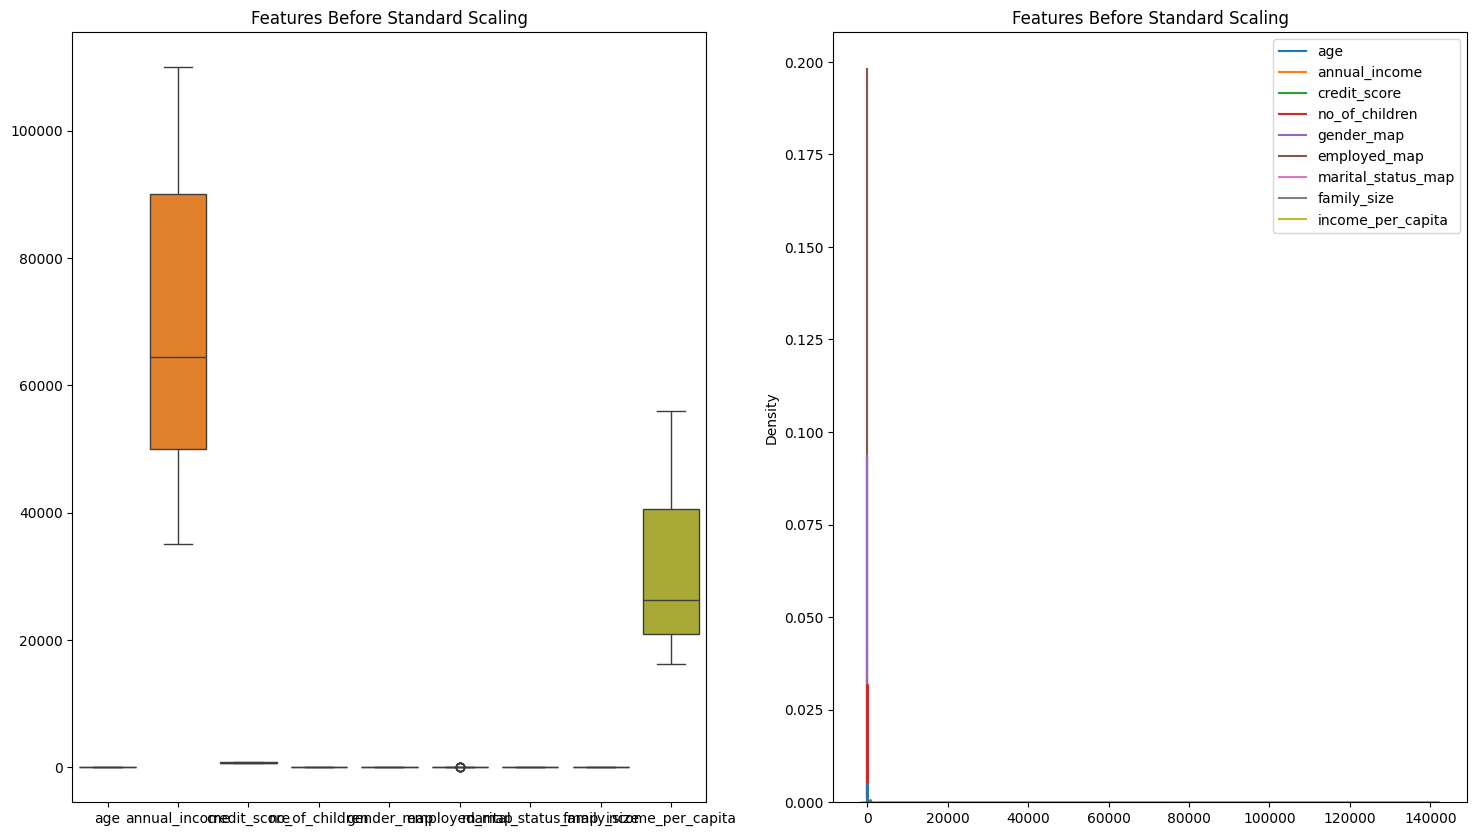

In [477]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features Before Standard Scaling")

sns.kdeplot(X_train, ax=axes[1])
axes[1].set_title("Features Before Standard Scaling")

In [478]:
scale_cols = ['age', 'annual_income', 'credit_score', 'income_per_capita']

X_train[scale_cols] = (X_train[scale_cols] - X_train[scale_cols].mean()) / X_train[scale_cols].std()
X_test[scale_cols] = (X_test[scale_cols] - X_test[scale_cols].mean()) / X_test[scale_cols].std()

Text(0.5, 1.0, 'Features After Standard Scaling')

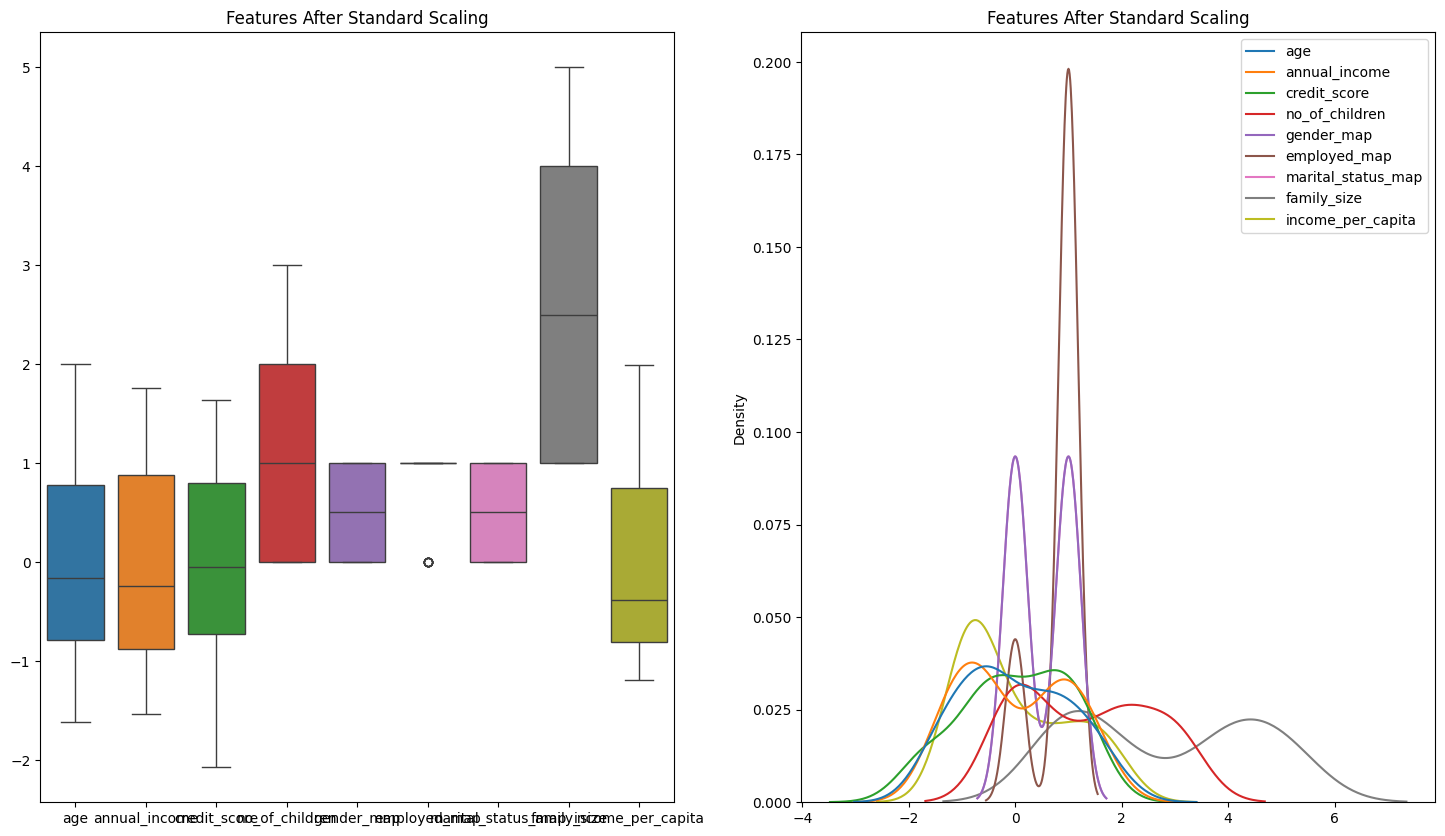

In [479]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Features After Standard Scaling")

sns.kdeplot(X_train, ax=axes[1])
axes[1].set_title("Features After Standard Scaling")

### D.4 Support Vector Machine

#### SVM Training

In [480]:
def train_svm(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    X = np.array(X)
    y = np.array(y)
    
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for i in range(n_iters):
        for idx, x_i in enumerate(X):
            
            condition = y[idx] * (np.dot(x_i, weights) + bias) >= 1
            
            if condition:
                weights -= learning_rate * (2 * lambda_param * weights)
            else:
                weights -= learning_rate * (2 * lambda_param * weights - np.dot(x_i, y[idx]))
                bias += learning_rate * y[idx]
                
    return weights, bias


#### SVM Predict

In [481]:
def predict_svm(X, weights, bias):
    X = np.array(X)
    linear_output = np.dot(X, weights) + bias
    return np.sign(linear_output)

#### SVM Predict Results

In [482]:
best_w, best_b = train_svm(X_train, y_train, learning_rate=0.001, lambda_param=0.01, n_iters=1000)
print(f"Best Weight (Slope):{best_w}\n")
print(f"Best Bias (Intercept):{best_b}")

test_predictions = predict_svm(X_test, best_w, best_b)
train_predictions = predict_svm(X_train, best_w, best_b)

Best Weight (Slope):[ 0.20941725  0.48658286  0.24284706 -0.11970794  0.64008782 -0.32394064
  0.64008782  0.16771548 -0.49845367]

Best Bias (Intercept):-0.6920000000000005


## E. Evaluation


### E.1 Model Accuracy

#### Test Accuracy

In [483]:
test_accuracy = np.mean(test_predictions == y_test)
print(f"{test_accuracy:.4f}") 

1.0000


#### Train Accuracy

In [484]:
train_accuracy = np.mean(train_predictions == y_train)
print(f"{train_accuracy:.4f}") 

1.0000


### E.2 Confusion Matrix

In [490]:
pred_array = np.array(test_predictions)
test_array = np.array(y_test)

TP = np.sum((pred_array == 1) & (test_array == 1))
FP = np.sum((pred_array == 1) & (test_array == -1))
FN = np.sum((pred_array == -1) & (test_array == 1))
TN = np.sum((pred_array == -1) & (test_array == -1))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

True Positives: 6
False Positives: 0
False Negatives: 0
True Negatives: 6


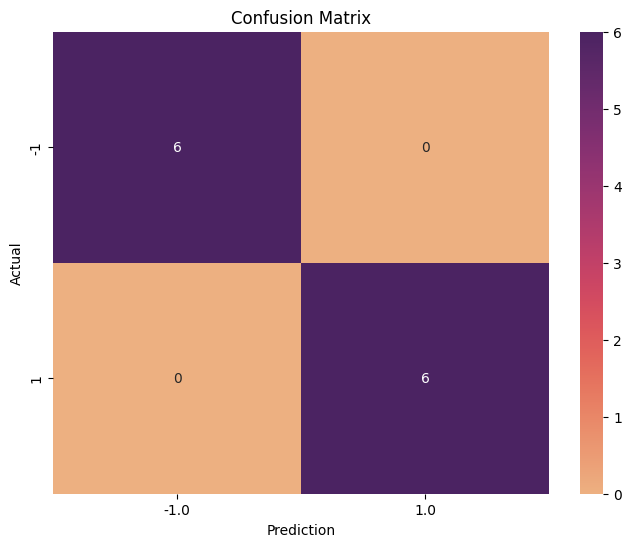

Class: Positive
True Positives: 6
False Positives: 0
False Negatives: 0
True Negatives: 6

Class: Positive
True Positives: 6
False Positives: 0
False Negatives: 0
True Negatives: 6



In [486]:
confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        classes = "Negative"
    else:
        classes = "Positive"
        
    print(f"Class: {classes}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### E.3 Precision

In [487]:
precision = TP / (TP + FP)
precision = np.mean(precision)
print(f"{precision:.2f}")

1.00


### E.4 Recall

In [488]:
recall = TP / (TP + FN)
recall = np.mean(recall)
print(f"{recall:.2f}")

1.00


### E.5 F-1 Score

In [489]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"{f1:.2f}")

1.00
